In [28]:
import tensorflow as tf
import began
import numpy as np
import os
from pathlib import Path
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
PROJ_DIR = Path("/home/bthorne/projects/gan/began")
# Model directory
MODEL_PATH = PROJ_DIR / "models" / "mnist_dcgan_NTRAIN1000.h5"

In [5]:
# Network architecture
DEPTH = 32
IMG_DIM = 28
CHANNELS = 1
KERNELS = [5, 5, 5]
STRIDES = [2, 2, 2]
FILTERS = [DEPTH * 2 ** i for i in range(len(KERNELS))]
LATENT_DIM = 64

In [6]:
# Derived parameters
SHAPE = (IMG_DIM, IMG_DIM, CHANNELS)

In [7]:
# Training parameters
TRAIN_STEPS = 5000
BATCH_SIZE = 32

In [9]:
# Build inidividual and joint models.
DIS = began.dcgan.build_discriminator(FILTERS, KERNELS, STRIDES, SHAPE)
GEN = began.dcgan.build_generator(DIS, FILTERS, KERNELS, STRIDES, LATENT_DIM, SHAPE)
ADV = began.dcgan.build_adversarial_model(DIS, GEN)

In [12]:
print(GEN.summary())
# Load raw training data
(X_TRAIN, _), (_, _) = mnist.load_data()

Model: "Generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_G (Dense)              (None, 2048)              133120    
_________________________________________________________________
Reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
BNorm_G1 (BatchNormalization (None, 4, 4, 128)         512       
_________________________________________________________________
LRelu_G1 (LeakyReLU)         (None, 4, 4, 128)         0         
_________________________________________________________________
UpSample_1 (UpSampling2D)    (None, 8, 8, 128)         0         
_________________________________________________________________
Conv2D_G1 (Conv2D)           (None, 8, 8, 64)          204864    
_________________________________________________________________
BN_G2 (BatchNormalization)   (None, 8, 8, 64)          25

In [13]:
# Apply preprocessing to scale data
X_TRAIN = X_TRAIN[..., None] / 255. * 2. - 1.

In [15]:
trained_model = began.dcgan.training_schedule(DIS, GEN, ADV, X_TRAIN[:1000],
    LATENT_DIM, TRAIN_STEPS, BATCH_SIZE)


Step number 00000 of 5000, GAN loss is 0.723
Step number 00001 of 5000, GAN loss is 0.619
Step number 00002 of 5000, GAN loss is 0.459
Step number 00003 of 5000, GAN loss is 0.482
Step number 00004 of 5000, GAN loss is 0.681
Step number 00005 of 5000, GAN loss is 0.797
Step number 00006 of 5000, GAN loss is 0.580
Step number 00007 of 5000, GAN loss is 0.671
Step number 00008 of 5000, GAN loss is 1.008
Step number 00009 of 5000, GAN loss is 1.655
Step number 00010 of 5000, GAN loss is 2.646
Step number 00011 of 5000, GAN loss is 2.570
Step number 00012 of 5000, GAN loss is 1.938
Step number 00013 of 5000, GAN loss is 1.564
Step number 00014 of 5000, GAN loss is 1.383
Step number 00015 of 5000, GAN loss is 0.956
Step number 00016 of 5000, GAN loss is 0.855
Step number 00017 of 5000, GAN loss is 0.840
Step number 00018 of 5000, GAN loss is 1.344
Step number 00019 of 5000, GAN loss is 2.708
Step number 00020 of 5000, GAN loss is 3.260
Step number 00021 of 5000, GAN loss is 2.572
Step numbe

NameError: name 'os' is not defined

In [19]:
trained_model.save(os.fspath(MODEL_PATH))

In [20]:
model = tf.keras.models.load_model(os.fspath(MODEL_PATH))

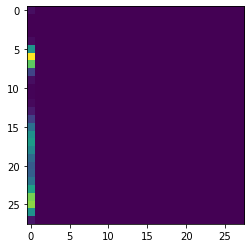

In [36]:
plt.imshow(model.get_layer('Generator').predict(np.random.randn(1, 64))[0, :, :, 0])